In [12]:
import pandas as pd
import numpy as np
import sklearn
import csv
import io

In [ ]:
# to read files in collab
from google.colab import files


uploaded = files.upload()

Saving all_musk_posts.csv to all_musk_posts.csv


In [13]:
tweet_data = pd.read_csv(io.BytesIO(uploaded['all_musk_posts.csv']))
tweet_data.head(100)

<ipython-input-13-2ccb2cf43ced>:1: DtypeWarning: Columns (11,16,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  tweet_data = pd.read_csv(io.BytesIO(uploaded['all_musk_posts.csv']))


,id,url,twitterUrl,fullText,retweetCount,replyCount,likeCount,quoteCount,viewCount,createdAt,...,inReplyToUserId,inReplyToUsername,isPinned,isRetweet,isQuote,isConversationControlled,possiblySensitive,quoteId,quote,retweet
0,1655159652990976000,https://x.com/elonmusk/status/1655159652990976000,https://twitter.com/elonmusk/status/1655159652...,RT @einarvollset: I read @paulg’s “How to Mak...,NaN,NaN,NaN,NaN,NaN,2023-05-07 10:36:27+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1657261624867299339,https://x.com/elonmusk/status/1657261624867299339,https://twitter.com/elonmusk/status/1657261624...,https://t.co/Zjn6r15lrR,NaN,NaN,NaN,NaN,NaN,2023-05-13 05:48:56+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1623774484795920384,https://x.com/elonmusk/status/1623774484795920384,https://twitter.com/elonmusk/status/1623774484...,RT @BillyM2k: dude bookmarks are an awesome tw...,NaN,NaN,NaN,NaN,NaN,2023-02-09 20:03:00+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1656900119202254854,https://x.com/elonmusk/status/1656900119202254854,https://twitter.com/elonmusk/status/1656900119...,Event Horizon Balance Beam,NaN,NaN,NaN,NaN,NaN,2023-05-12 05:52:26+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1616531874763116544,https://x.com/elonmusk/status/1616531874763116544,https://twitter.com/elonmusk/status/1616531874...,RT @BillyM2k: @elonmusk oh that’s actually pre...,NaN,NaN,NaN,NaN,NaN,2023-01-20 20:23:27+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,923469108917756032,https://x.com/elonmusk/status/923469108917756032,https://twitter.com/elonmusk/status/9234691089...,Campfire on the Gigafactory roof https://t.co/...,749.0,NaN,8785.0,NaN,NaN,2017-10-26 08:39:27+00:00,...,NaN,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN
96,923339941957976064,https://x.com/elonmusk/status/923339941957976064,https://twitter.com/elonmusk/status/9233399419...,Just feed it The Godfather movies as input. Wh...,5190.0,NaN,20573.0,NaN,NaN,2017-10-26 00:06:11+00:00,...,NaN,NaN,NaN,False,True,NaN,NaN,9.232383e+17,NaN,NaN
97,922828793152229248,https://x.com/elonmusk/status/922828793152229248,https://twitter.com/elonmusk/status/9228287931...,@verge Groan,307.0,NaN,4241.0,NaN,NaN,2017-10-24 14:15:04+00:00,...,2.756866e+08,verge,NaN,False,False,NaN,NaN,NaN,NaN,NaN
98,921575999384326144,https://x.com/elonmusk/status/921575999384326144,https://twitter.com/elonmusk/status/9215759993...,@jamesharvey1991 It won't even need to ask you...,29.0,NaN,368.0,NaN,NaN,2017-10-21 03:16:54+00:00,...,2.241545e+09,jamesbarr1991,NaN,False,False,NaN,NaN,NaN,NaN,NaN


In [14]:
tweet_data.describe()

,id,retweetCount,replyCount,likeCount,quoteCount,viewCount,bookmarkCount,inReplyToId,conversationId,inReplyToUserId,quoteId
count,5.509900e+04,55009.000000,54297.000000,5.500900e+04,54271.000000,3.445500e+04,54271.000000,3.949700e+04,5.429700e+04,3.952100e+04,7.541000e+03
mean,1.565238e+18,5152.859841,2375.592685,4.154156e+04,485.358442,8.839065e+06,810.181478,1.572386e+18,1.574776e+18,4.650182e+17,1.790196e+18
std,3.538849e+17,14041.809886,6747.502876,1.064703e+05,3075.282293,1.879434e+07,3479.675005,3.104468e+17,3.446097e+17,6.253846e+17,2.077654e+17
min,1.543473e+10,0.000000,0.000000,0.000000e+00,0.000000,1.000000e+00,0.000000,1.659576e+09,1.659576e+09,1.200000e+01,1.659601e+09
25%,1.402685e+18,80.000000,102.000000,1.351000e+03,8.000000,6.829150e+04,12.000000,1.419324e+18,1.419782e+18,4.419640e+07,1.806650e+18
50%,1.687677e+18,276.000000,271.000000,4.198000e+03,29.000000,2.489050e+05,32.000000,1.672634e+18,1.691963e+18,9.401079e+08,1.855711e+18
75%,1.832968e+18,2608.000000,1478.000000,2.858800e+04,205.000000,8.024403e+06,180.500000,1.805232e+18,1.834187e+18,1.106321e+18,1.886091e+18
max,1.911532e+18,610842.000000,357538.000000,4.372808e+06,439431.000000,6.071525e+08,161373.000000,1.906943e+18,1.911532e+18,1.901635e+18,1.911425e+18


In [15]:
tweet_data.columns

Index(['id', 'url', 'twitterUrl', 'fullText', 'retweetCount', 'replyCount',
       'likeCount', 'quoteCount', 'viewCount', 'createdAt', 'bookmarkCount',
       'isReply', 'inReplyToId', 'conversationId', 'inReplyToUserId',
       'inReplyToUsername', 'isPinned', 'isRetweet', 'isQuote',
       'isConversationControlled', 'possiblySensitive', 'quoteId', 'quote',
       'retweet'],
      dtype='object')

In [23]:
#selecting only required features
sentiment_data = tweet_data.loc[:, ["createdAt", "fullText", "likeCount"]].dropna()
sentiment_data.head()

,createdAt,fullText,likeCount
90,2017-11-09 17:28:57+00:00,"""If one day, my words are against science, cho...",104722.0
91,2017-11-08 18:55:13+00:00,Atatürk Anıtkabir https://t.co/al3wt0njr6,104823.0
92,2017-10-28 21:36:18+00:00,@uncover007 500 ft so far. Should be 2 miles l...,2128.0
93,2017-10-28 21:30:41+00:00,Picture of The Boring Company LA tunnel taken ...,58882.0
94,2017-10-26 15:45:39+00:00,"Whiskey, fire, s’mores and JC\r\n\r\nAlso, hot...",11563.0
...,...,...,...
185,2017-08-18 12:31:57+00:00,Wigs me out too much. Deleting ...,2464.0
186,2017-08-14 23:13:28+00:00,"@PatricknLA @ericgarcetti Yes, just that the p...",645.0
187,2017-08-13 15:56:46+00:00,First draft animation of the Falcon Heavy thre...,9952.0
188,2017-08-12 00:29:40+00:00,"If you're not concerned about AI safety, you s...",38339.0


**Cleaning the columns**

In [24]:
#converting to datetime object
sentiment_data['createdAt'] = pd.to_datetime(sentiment_data['createdAt'])
sentiment_data['date'] = sentiment_data['createdAt'].dt.date

In [26]:
check=sentiment_data[sentiment_data['fullText'].str.startswith("RT")==True]
check

,createdAt,fullText,likeCount,date
14221,2017-10-14 17:47:39+00:00,RT @YGEXStaff: 【#iKON】\n初の静岡公演来て頂いた皆さまありがとうござい...,0.0,2017-10-14
14227,2017-08-27 20:31:06+00:00,RT @bangtan_germany: [INFO] Jungkook am Times ...,0.0,2017-08-27
14228,2017-08-19 01:11:17+00:00,RT @VoluntadPopular: La dictadura convocó las ...,0.0,2017-08-19
14229,2017-08-11 04:38:49+00:00,RT @maludodecorazon: ¡¡PERO TENEMOS LA MEJOR G...,0.0,2017-08-11
14231,2017-08-06 23:55:44+00:00,RT @kyungsoo_stan: EXO'S REACTION KING EVERYON...,0.0,2017-08-06
...,...,...,...,...
48046,2025-03-25 02:36:46+00:00,RT @ShadowofEzra: President Trump drops a majo...,43432.0,2025-03-25
48047,2025-03-25 02:35:03+00:00,RT @Starlink: Starlink enables high-speed inte...,9730.0,2025-03-25
48048,2025-03-25 01:48:02+00:00,RT @BasedMikeLee: We need to move as if we hav...,31143.0,2025-03-25
48049,2025-03-25 01:06:36+00:00,RT @BehizyTweets: RFK Jr. says Elon Musk &amp;...,43368.0,2025-03-25


**RT -> indicates Retweets. So need to delete the "FullText" == startswith "RT"**

In [28]:
 sentiment_data = sentiment_data[sentiment_data['fullText'].str.startswith('RT') == False]
 sentiment_data

,createdAt,fullText,likeCount,date
90,2017-11-09 17:28:57+00:00,"""If one day, my words are against science, cho...",104722.0,2017-11-09
91,2017-11-08 18:55:13+00:00,Atatürk Anıtkabir https://t.co/al3wt0njr6,104823.0,2017-11-08
92,2017-10-28 21:36:18+00:00,@uncover007 500 ft so far. Should be 2 miles l...,2128.0,2017-10-28
93,2017-10-28 21:30:41+00:00,Picture of The Boring Company LA tunnel taken ...,58882.0,2017-10-28
94,2017-10-26 15:45:39+00:00,"Whiskey, fire, s’mores and JC\r\n\r\nAlso, hot...",11563.0,2017-10-26
...,...,...,...,...
55094,2024-12-03 00:53:21+00:00,@alx Cool,1713.0,2024-12-03
55095,2024-12-03 00:21:37+00:00,@alx She is an activist posing as a judge,3682.0,2024-12-03
55096,2024-12-03 00:20:24+00:00,Absolutely,81839.0,2024-12-03
55097,2024-12-03 00:06:57+00:00,@BillyM2k Absolutely,1812.0,2024-12-03


**Removing Links from the "Fulltext" and the the tweet which is very short**

In [31]:
sentiment_data['fullText'] = sentiment_data['fullText'].str.replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)
sentiment_data

<ipython-input-31-7d08969241e7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_data['fullText'] = sentiment_data['fullText'].str.replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)


,createdAt,fullText,likeCount,date
90,2017-11-09 17:28:57+00:00,"""If one day, my words are against science, cho...",104722.0,2017-11-09
91,2017-11-08 18:55:13+00:00,Atatürk Anıtkabir,104823.0,2017-11-08
92,2017-10-28 21:36:18+00:00,@uncover007 500 ft so far. Should be 2 miles l...,2128.0,2017-10-28
93,2017-10-28 21:30:41+00:00,Picture of The Boring Company LA tunnel taken ...,58882.0,2017-10-28
94,2017-10-26 15:45:39+00:00,"Whiskey, fire, s’mores and JC\r\n\r\nAlso, hot...",11563.0,2017-10-26
...,...,...,...,...
55092,2024-12-03 01:44:19+00:00,@tunguz Haha wow,1184.0,2024-12-03
55093,2024-12-03 01:10:16+00:00,"Shareholders should control company votes, not...",209540.0,2024-12-03
55095,2024-12-03 00:21:37+00:00,@alx She is an activist posing as a judge,3682.0,2024-12-03
55097,2024-12-03 00:06:57+00:00,@BillyM2k Absolutely,1812.0,2024-12-03


In [32]:
sentiment_data= sentiment_data[sentiment_data['fullText'].str.len() > 10]

**Now we have clean data to build sentiment model using pyhton's module - Vader **

In [33]:
#importing necessary modules
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [35]:
#converting our sentiment_data dataframe to csv file
sentiment_data.to_csv("Final_tweet_data.csv")

we are using VADER, which assigns each tweet a compound sentiment score between:

+1.0 → Very positive

0.0 → Neutral

-1.0 → Very negative

So if the language in a tweet is negative, the model will detect it and assign a negative score.

In [37]:
#Applying SentimentAnalyser to create sentiment_score column
sid = SentimentIntensityAnalyzer()
sentiment_data['sentiment_score'] = sentiment_data['fullText'].apply(lambda x: sid.polarity_scores(x)['compound'])


,createdAt,fullText,likeCount,date,sentiment_score
90,2017-11-09 17:28:57+00:00,"""If one day, my words are against science, cho...",104722.0,2017-11-09,0.0000
91,2017-11-08 18:55:13+00:00,Atatürk Anıtkabir,104823.0,2017-11-08,0.0000
92,2017-10-28 21:36:18+00:00,@uncover007 500 ft so far. Should be 2 miles l...,2128.0,2017-10-28,0.4019
93,2017-10-28 21:30:41+00:00,Picture of The Boring Company LA tunnel taken ...,58882.0,2017-10-28,-0.3182
94,2017-10-26 15:45:39+00:00,"Whiskey, fire, s’mores and JC\r\n\r\nAlso, hot...",11563.0,2017-10-26,-0.3400


In [38]:
sentiment_data.head()

,createdAt,fullText,likeCount,date,sentiment_score
90,2017-11-09 17:28:57+00:00,"""If one day, my words are against science, cho...",104722.0,2017-11-09,0.0000
91,2017-11-08 18:55:13+00:00,Atatürk Anıtkabir,104823.0,2017-11-08,0.0000
92,2017-10-28 21:36:18+00:00,@uncover007 500 ft so far. Should be 2 miles l...,2128.0,2017-10-28,0.4019
93,2017-10-28 21:30:41+00:00,Picture of The Boring Company LA tunnel taken ...,58882.0,2017-10-28,-0.3182
94,2017-10-26 15:45:39+00:00,"Whiskey, fire, s’mores and JC\r\n\r\nAlso, hot...",11563.0,2017-10-26,-0.3400


**To analyse how impactful each tweet was - calculating weighted sentiment by multiplying sentiment score with likecounts**

In [39]:
sentiment_data['weighted_sentiment'] = sentiment_data['sentiment_score'] * sentiment_data['likeCount']


In [40]:
sentiment_data.head()

,createdAt,fullText,likeCount,date,sentiment_score,weighted_sentiment
90,2017-11-09 17:28:57+00:00,"""If one day, my words are against science, cho...",104722.0,2017-11-09,0.0000,0.0000
91,2017-11-08 18:55:13+00:00,Atatürk Anıtkabir,104823.0,2017-11-08,0.0000,0.0000
92,2017-10-28 21:36:18+00:00,@uncover007 500 ft so far. Should be 2 miles l...,2128.0,2017-10-28,0.4019,855.2432
93,2017-10-28 21:30:41+00:00,Picture of The Boring Company LA tunnel taken ...,58882.0,2017-10-28,-0.3182,-18736.2524
94,2017-10-26 15:45:39+00:00,"Whiskey, fire, s’mores and JC\r\n\r\nAlso, hot...",11563.0,2017-10-26,-0.3400,-3931.4200


In [42]:
#creating final data after sentiment analysis
daily_sentiment = sentiment_data.groupby('date').agg({
    'sentiment_score': 'mean',
    'weighted_sentiment': 'sum',
    'likeCount': 'sum',
    'fullText': 'count'  # Number of tweets that day
}).rename(columns={
    'likeCount': 'total_likes',
    'fullText': 'tweet_count'
}).reset_index()


In [43]:
daily_sentiment.head()

,date,sentiment_score,weighted_sentiment,total_likes,tweet_count
0,2010-06-04,0.493900,3157.0088,6392.0,1
1,2011-12-01,0.429400,169.1836,321.0,2
2,2011-12-03,0.299700,52.1478,220.0,2
3,2011-12-04,0.734600,184.3846,251.0,1
4,2011-12-21,0.245443,386.8294,3293.0,7


In [44]:
#converting to csv file
daily_sentiment.to_csv("daily_sentiment.csv")

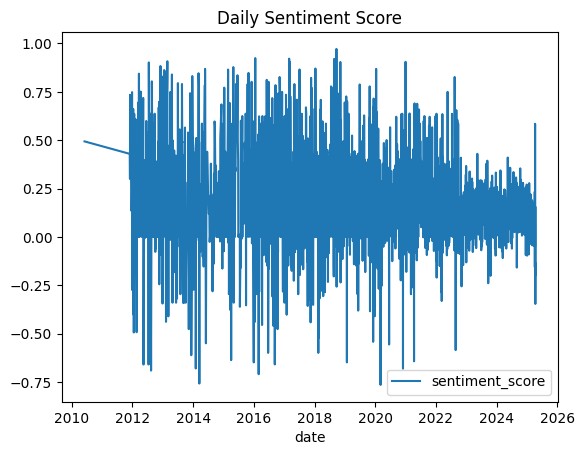

<Figure size 640x480 with 0 Axes>

In [47]:
import matplotlib.pyplot as plt

daily_sentiment.plot(x='date', y='sentiment_score', title='Daily Sentiment Score')
plt.show()
plt.savefig("tweet_time_series.png")